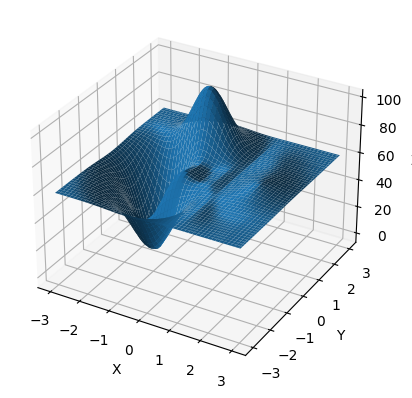

In [7]:
import numpy as np

def z_function(x, y):
    return 3*(1-x)**2*(np.exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5)*(np.exp(-x**2 - y**2)) - 1/3*(np.exp(-(x+1)**2-y**2))) + 60
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la gama de valores de x e y
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)

# Crear una cuadrícula 2D de valores x e y
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Calcular los valores de z para cada punto de la cuadrícula
z_grid = z_function(x_grid, y_grid)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
ax.plot_surface(x_grid, y_grid, z_grid)

# Configurar las etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar la figura
plt.show()


In [1]:
import random
import math

# Definir la función a optimizar
def fitness_function(x, y):
    z = 3 * (1 - x) ** 2 * (math.exp(-x ** 2 - (y + 1) ** 2)) - 10 * (x / 5 - x ** 3 - y ** 5) * (math.exp(-x ** 2 - y ** 2)) - 1 / 3 * (math.exp(-(x + 1) ** 2 - y ** 2))
    return z

# Definir el algoritmo genético
def genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate):
    
    # Inicializar la población
    population = []
    for i in range(population_size):
        x = random.uniform(-3, 3)
        y = random.uniform(-3, 3)
        population.append((x, y))
    
    # Evaluar la población inicial
    fitness_scores = [fitness_function(x, y) for x, y in population]
    
    # Encontrar la mejor solución de la población inicial
    best_fitness = max(fitness_scores)
    best_solution = population[fitness_scores.index(best_fitness)]
    print("Generación:", 0, "| Mejor solución:", best_solution, "| Fitness:", best_fitness)
    
    # Ejecutar las generaciones del algoritmo genético
    for i in range(num_generations):
        
        # Seleccionar padres con el método de ruleta
        fitness_sum = sum(fitness_scores)
        parent_indices = []
        for j in range(population_size):
            pick = random.uniform(0, fitness_sum)
            current_sum = 0
            for index, score in enumerate(fitness_scores):
                current_sum += score
                if current_sum > pick:
                    parent_indices.append(index)
                    break
        
        # Generar descendencia mediante cruce de un punto
        offspring = []
        for j in range(population_size // 2):
            parent1_index = parent_indices[2*j]
            parent2_index = parent_indices[2*j + 1]
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            if random.uniform(0, 1) < crossover_rate:
                crossover_point = random.randint(0, 1)
                offspring1 = (parent1[crossover_point], parent2[1-crossover_point])
                offspring2 = (parent2[crossover_point], parent1[1-crossover_point])
            else:
                offspring1 = parent1
                offspring2 = parent2
            offspring.append(offspring1)
            offspring.append(offspring2)
        
        # Mutar la descendencia con una mutación simple
        mutated_offspring = []
        for offspring in offspring:
            if random.uniform(0, 1) < mutation_rate:
                mutated_x = offspring[0] + random.uniform(-1, 1)
                mutated_y = offspring[1] + random.uniform(-1, 1)
                mutated_offspring.append((mutated_x, mutated_y))
            else:
                mutated_offspring.append(offspring)
        
        # Evaluar la descendencia mutada
        mutated_fitness_scores = [fitness_function(x, y) for x, y in mutated_offspring]
        
        # Reemplazar la población anterior con la descendencia mutada
        for j in range(population_size):
            if mutated_fitness_scores[j] > fitness_scores[j]:
                population[j] = mutated_offspring[j]
                fitness_scores[j] = mutated_fitness_scores[j]
        
        # Encontrar la mejor solución de la generación actual
        best_generation_fitness = max(fitness_scores)
        best_generation_solution = population[fitness_scores.index(best_generation_fitness)]
        
        # Actualizar la mejor solución encontrada hasta el momento
        if best_generation_fitness > best_fitness:
            best_fitness = best_generation_fitness
            best_solution = best_generation_solution
        
        # Imprimir información de la generación actual
        print("Generación:", i+1, "| Mejor solución:", best_generation_solution, "| Fitness:", best_generation_fitness)
    
    # Imprimir la mejor solución encontrada por el algoritmo genético
    print("La mejor solución encontrada es:", best_solution, "| Fitness:", best_fitness)

In [2]:
genetic_algorithm(20, 100, 0.9, 0.04)

Generación: 0 | Mejor solución: (1.9549690288219104, 2.518725540365356) | Fitness: 0.04171023050359815
Generación: 1 | Mejor solución: (1.8763225865444766, 1.9419882141404017) | Fitness: 0.23054582289846454
Generación: 2 | Mejor solución: (1.8763225865444766, 1.9419882141404017) | Fitness: 0.23054582289846454
Generación: 3 | Mejor solución: (1.8099217293142194, 1.9549690288219104) | Fitness: 0.28220334465136826
Generación: 4 | Mejor solución: (1.5920966914767196, 1.365167732001838) | Fitness: 1.0403740930776155
Generación: 5 | Mejor solución: (1.365167732001838, 1.8099217293142194) | Fitness: 1.2713461425924095
Generación: 6 | Mejor solución: (1.365167732001838, 1.5920966914767196) | Fitness: 1.53708327176731
Generación: 7 | Mejor solución: (1.365167732001838, 1.365167732001838) | Fitness: 1.687061079496688
Generación: 8 | Mejor solución: (1.365167732001838, 1.365167732001838) | Fitness: 1.687061079496688
Generación: 9 | Mejor solución: (1.365167732001838, 1.365167732001838) | Fitness:

In [4]:
genetic_algorithm(20, 95, 0.9, 0.04)

Generación: 0 | Mejor solución: (4.3321073718059555, 0.5413093911077809) | Fitness: 4.2677854976086595e-06
Generación: 1 | Mejor solución: (4.3321073718059555, 0.5413093911077809) | Fitness: 4.2677854976086595e-06
Generación: 2 | Mejor solución: (0.5413093911077809, 4.3321073718059555) | Fitness: 8.049751911357997e-05
Generación: 3 | Mejor solución: (0.5413093911077809, 0.5413093911077809) | Fitness: 0.5595236848663563
Generación: 4 | Mejor solución: (0.7111452886746625, 0.7526582510599491) | Fitness: 1.5676402964189557
Generación: 5 | Mejor solución: (0.7111452886746625, 0.7526582510599491) | Fitness: 1.5676402964189557
Generación: 6 | Mejor solución: (0.7526582510599491, 0.7526582510599491) | Fitness: 1.6623987565959388
Generación: 7 | Mejor solución: (0.3641711210300156, 1.0648561980950642) | Fitness: 3.787486275717145
Generación: 8 | Mejor solución: (0.3641711210300156, 1.0648561980950642) | Fitness: 3.787486275717145
Generación: 9 | Mejor solución: (0.6433159495148213, 1.262054958